# Introdução à análise exploratória

## Quais dados vamos explorar?


Para dar uma breve ideia sobre o conjunto de dados, ele contém 11.914 linhas e 16 colunas, que incluem características de carros, como tipo de combustível, potência do motor (HP), tipo de transmissão, consumo na estrada, consumo na cidade, preço (MSRP) e outras.

O conjunto de dados pode ser baixado [aqui](https://www.kaggle.com/CooperUnion/cardataset).



---



## 1. Importando as bibliotecas necessárias para EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



---



## 2. Carregando os dados em um dataframe Pandas

In [33]:
url = "https://raw.githubusercontent.com/zz4fap/c24_inteligencia_artificial/main/data/car_features.csv"
df = pd.read_csv(url)

# Mostrando as 5 primeiras linhas
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 3. Verificando as dimensões dos dados

In [34]:
df.shape

(11914, 16)

## 4. Verificando os tipos dos dados

OBS.: O Pandas usa `object` quando a coluna não dá pra ser interpretada com segurança como numérica/datetime/categórica, ou quando ela é texto (`string`).

In [35]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


## 5. Verificando as estatísticas básicas dos dados

OBS.: As estatísticas são calculadas apenas para as colunas numéricas.

In [36]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [37]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 5. Renaming the columns

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [38]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 6. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [39]:
df.shape

(11914, 10)

In [40]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


Now let us remove the duplicate data because it's ok to remove them.

In [41]:
df.count()      # Used to count the number of rows

,0
Make,11914
Model,11914
Year,11914
HP,11845
Cylinders,11884
Transmission,11914
Drive Mode,11914
MPG-H,11914
MPG-C,11914
Price,11914


So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [42]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [43]:
df.count()

,0
Make,10925
Model,10925
Year,10925
HP,10856
Cylinders,10895
Transmission,10925
Drive Mode,10925
MPG-H,10925
MPG-C,10925
Price,10925




---



## 7. Dropping the missing or null values.

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [44]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [45]:
df = df.dropna()    # Dropping the missing values.
df.count()

,0
Make,10827
Model,10827
Year,10827
HP,10827
Cylinders,10827
Transmission,10827
Drive Mode,10827
MPG-H,10827
MPG-C,10827
Price,10827


Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [46]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64




---



## 8. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

<Axes: xlabel='Price'>

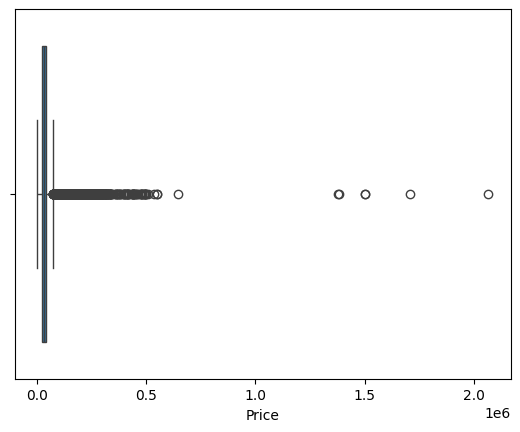

In [47]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

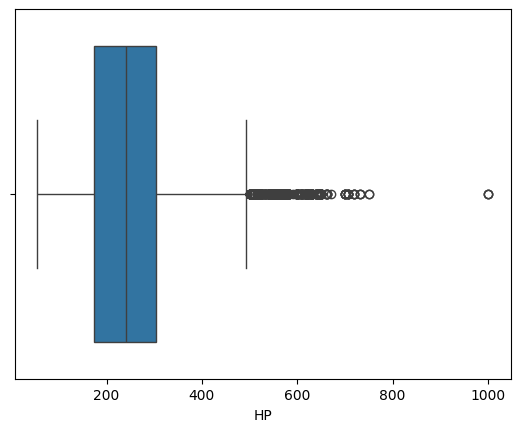

In [48]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

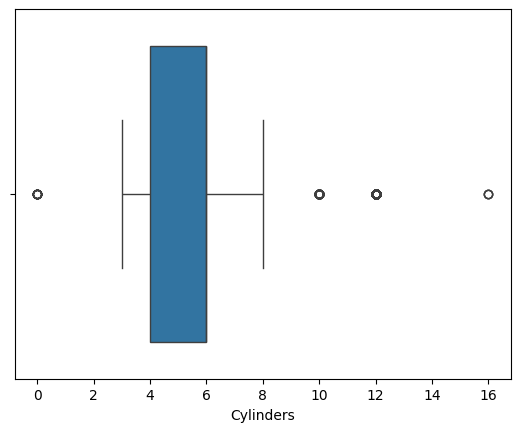

In [49]:
sns.boxplot(x=df['Cylinders'])

In [50]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.



---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

**Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.**

## Thank you.